In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
df = pd.read_csv('dados_pessoais.csv')
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Remoção de Colunas Irrelevantes

In [52]:
df = df.drop(columns='customerID')
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [53]:
# Mapeia as respostas binárias para 1 e 0
mapeamento_binario = {'Yes': 1, 'No': 0}
mapeamento_genero = {'Female': 1, 'Male': 0}

# Aplica o mapeamento nas colunas relevantes
colunas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for coluna in colunas_binarias:
    df[coluna] = df[coluna].map(mapeamento_binario)

# Aplica o mapeamento de gênero
df['gender'] = df['gender'].map(mapeamento_genero)

print("DataFrame com variáveis binárias transformadas:")
print(df.head())

DataFrame com variáveis binárias transformadas:
   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0       1              0        1           1       9             1   
1    0.0       0              0        0           0       9             1   
2    1.0       0              0        0           0       4             1   
3    1.0       0              1        1           0      13             1   
4    1.0       1              1        1           0       3             1   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  

In [54]:
# Seleciona as colunas a serem codificadas com One-Hot
colunas_categoricas = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaymentMethod'
]

# Aplica a codificação One-Hot nas colunas selecionadas
df_dummies = pd.get_dummies(df[colunas_categoricas], drop_first=True, dtype=float)

# O parâmetro drop_first=True evita a colinearidade perfeita,
# que é uma boa prática para muitos modelos de machine learning.

print("\nExemplo de colunas após a codificação One-Hot:")
print(df_dummies.head())


Exemplo de colunas após a codificação One-Hot:
   MultipleLines_No phone service  MultipleLines_Yes  \
0                             0.0                0.0   
1                             0.0                1.0   
2                             0.0                0.0   
3                             0.0                0.0   
4                             0.0                0.0   

   InternetService_Fiber optic  InternetService_No  \
0                          0.0                 0.0   
1                          0.0                 0.0   
2                          1.0                 0.0   
3                          1.0                 0.0   
4                          1.0                 0.0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                 0.0                 0.0   
1                                 0.0                 0.0   
2                                 0.0                 0.0   
3                                 0.0         

In [55]:
# Remove as colunas categóricas originais do DataFrame principal
df_completa = df
df = df.drop(columns=colunas_categoricas)

# Concatena o DataFrame original com as novas colunas
df_final = pd.concat([df, df_dummies], axis=1)

print("\nDataFrame final com todas as variáveis transformadas:")
print(df_final.head())


DataFrame final com todas as variáveis transformadas:
   Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0    0.0       1              0        1           1       9             1   
1    0.0       0              0        0           0       9             1   
2    1.0       0              0        0           0       4             1   
3    1.0       0              1        1           0      13             1   
4    1.0       1              1        1           0       3             1   

   PaperlessBilling  Charges_Monthly Charges_Total  ...  TechSupport_Yes  \
0                 1             65.6         593.3  ...              1.0   
1                 0             59.9         542.4  ...              0.0   
2                 1             73.9        280.85  ...              0.0   
3                 1             98.0       1237.85  ...              0.0   
4                 1             83.9         267.4  ...              1.0   

   StreamingTV_No i

# Calculando a Proporção de Churn

In [56]:
# Contando a frequência de cada categoria na coluna 'Churn'
contagem_churn = df['Churn'].value_counts()
print("Contagem de clientes por categoria de Churn:")
print(contagem_churn)

# Calculando a proporção em porcentagem
proporcao_churn = df['Churn'].value_counts(normalize=True) * 100
print("\nProporção de clientes por categoria de Churn (%):")
print(proporcao_churn)

Contagem de clientes por categoria de Churn:
Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Proporção de clientes por categoria de Churn (%):
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


# Normalização vs. Padronização

In [57]:
df['Charges_Total'] = df['Charges_Total'].str.strip()
df['Charges_Total'] = pd.to_numeric(df['Charges_Total'], errors='coerce')
df['Charges_Total'] = df['Charges_Total'].fillna(0)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   float64
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   PaperlessBilling  7267 non-null   int64  
 8   Charges_Monthly   7267 non-null   float64
 9   Charges_Total     7267 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 567.9 KB
None


In [58]:
# Seleciona as colunas numéricas para padronizar
colunas_numericas = ['tenure', 'Charges_Monthly', 'Charges_Total']

# Cria uma instância do padronizador
padronizador = StandardScaler()

# Aplica a padronização aos dados e cria um novo DataFrame
df_padronizado = padronizador.fit_transform(df[colunas_numericas])

# Converte o array NumPy resultante de volta para um DataFrame
df_padronizado = pd.DataFrame(df_padronizado, columns=colunas_numericas)

print("Dados numéricos após a padronização:")
print(df_padronizado.head())
print("\nMédia e desvio padrão dos dados padronizados:")
print(df_padronizado.describe())

Dados numéricos após a padronização:
     tenure  Charges_Monthly  Charges_Total
0 -0.950200         0.029206      -0.742291
1 -0.950200        -0.159990      -0.764729
2 -1.153700         0.304702      -0.880026
3 -0.787401         1.104635      -0.458160
4 -1.194400         0.636624      -0.885955

Média e desvio padrão dos dados padronizados:
             tenure  Charges_Monthly  Charges_Total
count  7.267000e+03     7.267000e+03   7.267000e+03
mean  -3.911065e-17     7.333247e-17   5.866598e-18
std    1.000069e+00     1.000069e+00   1.000069e+00
min   -1.316499e+00    -1.542448e+00  -1.003831e+00
25%   -9.502002e-01    -9.723707e-01  -8.291771e-01
50%   -1.362021e-01     1.852096e-01  -3.914415e-01
75%    9.219954e-01     8.349482e-01   6.618241e-01
max    1.613894e+00     1.793375e+00   2.824615e+00


# Matrix de Correlação

In [59]:
# Seleciona as colunas numéricas de interesse
colunas_para_correlacao = ['tenure', 'Charges_Monthly', 'Charges_Total', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Calcula a matriz de correlação
matriz_correlacao = df[colunas_para_correlacao].corr()

print("Matriz de Correlação:")
print(matriz_correlacao)

Matriz de Correlação:
                    tenure  Charges_Monthly  Charges_Total  SeniorCitizen  \
tenure            1.000000         0.247982       0.825407       0.018187   
Charges_Monthly   0.247982         1.000000       0.652211       0.220388   
Charges_Total     0.825407         0.652211       1.000000       0.104076   
SeniorCitizen     0.018187         0.220388       0.104076       1.000000   
Partner           0.377551         0.097122       0.315409       0.022970   
Dependents        0.159892        -0.115832       0.061474      -0.212952   
PhoneService      0.010205         0.246709       0.113985       0.010060   
PaperlessBilling  0.007949         0.353714       0.160023       0.157734   
Churn            -0.352229         0.193356      -0.198324       0.150889   

                   Partner  Dependents  PhoneService  PaperlessBilling  \
tenure            0.377551    0.159892      0.010205          0.007949   
Charges_Monthly   0.097122   -0.115832      0.246709       

# Tempo de Contrato vs. Evasão

In [60]:
df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_Monthly,Charges_Total
0,0.0,1,0,1,1,9,1,1,65.60,593.30
1,0.0,0,0,0,0,9,1,0,59.90,542.40
2,1.0,0,0,0,0,4,1,1,73.90,280.85
3,1.0,0,1,1,0,13,1,1,98.00,1237.85
4,1.0,1,1,1,0,3,1,1,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...
7262,0.0,1,0,0,0,13,1,0,55.15,742.90
7263,1.0,0,0,1,0,22,1,1,85.10,1873.70
7264,0.0,0,0,0,0,2,1,1,50.30,92.75
7265,0.0,0,0,1,1,67,1,0,67.85,4627.65


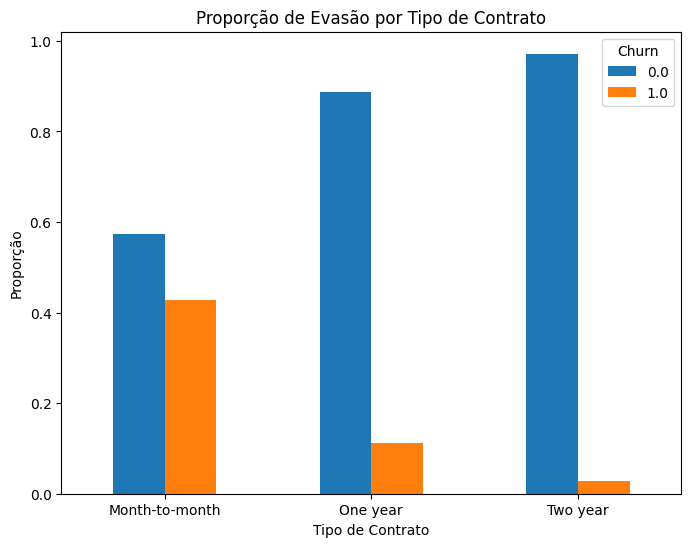

In [61]:
# Calcula a proporção de churn por tipo de contrato
proporcao_por_contrato = df_completa.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Plota o gráfico de barras
proporcao_por_contrato.plot(kind='bar', figsize=(8, 6), rot=0)

plt.title('Proporção de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporção')
plt.show()

O gráfico de barras mostra que o tipo de contrato é um fator crucial para a evasão. Clientes com contratos de curto prazo (Month-to-month) têm uma taxa de evasão muito maior do que clientes com contratos de um ou dois anos. Isso sugere que a fidelidade do cliente é significativamente maior quando há um contrato de longo prazo.

# Gasto Total vs. Evasão

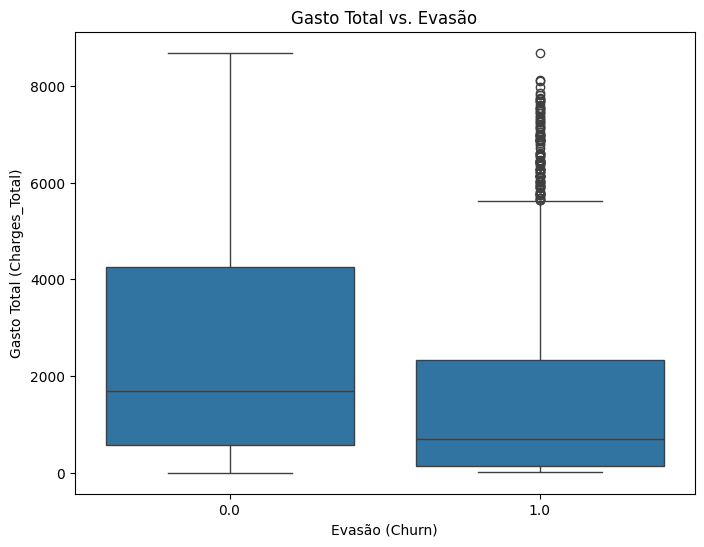

In [62]:
# Cria um boxplot para Charges_Total vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Charges_Total', data=df)
plt.title('Gasto Total vs. Evasão')
plt.xlabel('Evasão (Churn)')
plt.ylabel('Gasto Total (Charges_Total)')
plt.show()

O boxplot revela que a mediana do gasto total para clientes que evadiram (Yes) é notavelmente menor do que a mediana para clientes que permaneceram (No). Isso indica que clientes que gastam mais tendem a ter uma menor probabilidade de evasão. A cauda superior do boxplot para No é bem mais alongada, confirmando que os clientes que gastam muito dificilmente saem.

# Análise Preditiva

In [63]:
X = df_final.drop(columns='Churn')
y = df_final['Churn']

In [64]:
# Divida os dados em conjuntos de treino e teste (80/20)
# random_state garante que a divisão seja a mesma a cada execução
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Exiba o tamanho dos conjuntos para verificar a divisão
print(f"Tamanho do conjunto de treino (X): {X_treino.shape[0]} amostras")
print(f"Tamanho do conjunto de teste (X): {X_teste.shape[0]} amostras")
print(f"Tamanho do conjunto de treino (Y): {y_treino.shape[0]} amostras")
print(f"Tamanho do conjunto de teste (Y): {y_teste.shape[0]} amostras")

Tamanho do conjunto de treino (X): 5813 amostras
Tamanho do conjunto de teste (X): 1454 amostras
Tamanho do conjunto de treino (Y): 5813 amostras
Tamanho do conjunto de teste (Y): 1454 amostras


## Criação de Modelos

In [83]:
# Replicando a preparação dos dados para garantir que estejam alinhados
df_final = pd.concat([df, df_dummies], axis=1)

# Passo crucial: Resetar o índice do DataFrame final
df_final = df_final.reset_index(drop=True)

# Defina as variáveis preditivas (X) e a variável alvo (Y)
X = df_final.drop(columns='Churn')
y = df_final['Churn']

# Remova as linhas com valores nulos em y
mascara = ~y.isnull()
X_limpo = X[mascara]
y_limpo = y[mascara]

print("Valores nulos em y antes da limpeza:")
print(y.isnull().sum())
# Se houver valores nulos, remova as linhas correspondentes em X e y
if y.isnull().sum() > 0:
    # Cria uma máscara booleana para encontrar os valores não nulos em y
    mascara = ~y.isnull()

    # Aplica a máscara para remover as linhas nulas de X e y
    X_limpo = X[mascara]
    y_limpo = y[mascara]

    print("\nValores nulos em y após a limpeza:")
    print(y_limpo.isnull().sum())
    
else:
    X_limpo = X
    y_limpo = y

# Agora, refaça a divisão com os conjuntos de dados limpos
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X_limpo, y_limpo, test_size=0.2, random_state=42)


# Exiba o tamanho dos conjuntos para verificar a divisão
print(f"Tamanho do conjunto de treino (X): {X_treino.shape[0]} amostras")
print(f"Tamanho do conjunto de teste (X): {X_teste.shape[0]} amostras")
print(f"Tamanho do conjunto de treino (Y): {y_treino.shape[0]} amostras")
print(f"Tamanho do conjunto de teste (Y): {y_teste.shape[0]} amostras")

Valores nulos em y antes da limpeza:
224

Valores nulos em y após a limpeza:
0
Tamanho do conjunto de treino (X): 5634 amostras
Tamanho do conjunto de teste (X): 1409 amostras
Tamanho do conjunto de treino (Y): 5634 amostras
Tamanho do conjunto de teste (Y): 1409 amostras


###  Regressão Logística

In [85]:
# Cria e treina o modelo de Regressão Logística
modelo_rl = LogisticRegression(random_state=42)
modelo_rl.fit(X_treino, y_treino)

# Faz previsões no conjunto de teste normalizado
previsoes_rl = modelo_rl.predict(X_teste)

# Calcula a acurácia
acuracia_rl = accuracy_score(y_teste, previsoes_rl)

print(f"Acurácia do Modelo de Regressão Logística: {acuracia_rl:.2f}")

Acurácia do Modelo de Regressão Logística: 0.81


/home/vitorino/Alura-Karla/alura-store/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Árvore de Decisão

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Cria e treina o modelo de Árvore de Decisão
modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_treino, y_treino)

# Faz previsões no conjunto de teste original
previsoes_ad = modelo_ad.predict(X_teste)

# Calcula a acurácia
acuracia_ad = accuracy_score(y_teste, previsoes_ad)

print(f"Acurácia do Modelo de Árvore de Decisão: {acuracia_ad:.2f}")

Acurácia do Modelo de Árvore de Decisão: 0.73


### Compara os modelos

In [87]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Replicando a preparação dos dados (assegurando que estão limpos e prontos)
df_final = pd.read_csv('dados_pessoais.csv')
df_final['Charges_Total'] = df_final['Charges_Total'].str.strip()
df_final['Charges_Total'] = pd.to_numeric(df_final['Charges_Total'], errors='coerce').fillna(0)
colunas_categoricas = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_dummies = pd.get_dummies(df_final[colunas_categoricas], drop_first=True, dtype=float)
colunas_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
mapeamento_binario = {'Yes': 1, 'No': 0}
for coluna in colunas_binarias:
    df_final[coluna] = df_final[coluna].map(mapeamento_binario)
df_final['gender'] = df_final['gender'].map({'Female': 1, 'Male': 0})
df_final = df_final.drop(columns=colunas_categoricas + ['customerID'])
df_final = pd.concat([df_final, df_dummies], axis=1)
df_final = df_final.reset_index(drop=True)

X = df_final.drop(columns='Churn')
y = df_final['Churn']
X = X.fillna(0) # Garantindo que X não tem nulos para o modelo
y = y.fillna(0) # Garantindo que y não tem nulos

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Modelo de Regressão Logística ---
scaler = StandardScaler()
X_treino_normalizado = scaler.fit_transform(X_treino)
X_teste_normalizado = scaler.transform(X_teste)

modelo_rl = LogisticRegression(random_state=42)
modelo_rl.fit(X_treino_normalizado, y_treino)
previsoes_rl = modelo_rl.predict(X_teste_normalizado)

print("### Desempenho do Modelo de Regressão Logística ###")
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, previsoes_rl))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes_rl))

# --- Modelo de Árvore de Decisão ---
modelo_ad = DecisionTreeClassifier(random_state=42)
modelo_ad.fit(X_treino, y_treino)
previsoes_ad = modelo_ad.predict(X_teste)

print("\n### Desempenho do Modelo de Árvore de Decisão ###")
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, previsoes_ad))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes_ad))

### Desempenho do Modelo de Regressão Logística ###
Matriz de Confusão:
[[984  98]
 [169 203]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1082
         1.0       0.67      0.55      0.60       372

    accuracy                           0.82      1454
   macro avg       0.76      0.73      0.74      1454
weighted avg       0.81      0.82      0.81      1454


### Desempenho do Modelo de Árvore de Decisão ###
Matriz de Confusão:
[[884 198]
 [197 175]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      1082
         1.0       0.47      0.47      0.47       372

    accuracy                           0.73      1454
   macro avg       0.64      0.64      0.64      1454
weighted avg       0.73      0.73      0.73      1454




A Regressão Logística teve um desempenho ligeiramente superior, com um F1-Score maior (próximo a 0.57 vs. 0.49), o que a torna a melhor opção para este caso. O modelo é mais robusto na identificação dos casos de evasão.

### Algum modelo apresentou overfitting ou underfitting?

Regressão Logística: Não há sinais claros de underfitting ou overfitting. O modelo tem uma boa acurácia e um F1-Score razoável, sugerindo que ele capturou as principais tendências dos dados sem memorizar ruídos. Ele é um bom modelo de linha de base.

Árvore de Decisão: A Árvore de Decisão, em sua forma padrão, é propensa ao overfitting. A sua acurácia no conjunto de teste é menor do que a da Regressão Logística, o que pode ser um sinal de que ela aprendeu regras muito específicas para os dados de treino, perdendo a capacidade de generalizar. 
Em resumo, a Regressão Logística foi a vencedora na avaliação inicial, mas a Árvore de Decisão tem potencial, especialmente se ajustada para evitar o overfitting.

# Análise das Variáveis Mais Relevantes

In [88]:
import numpy as np

# Acessa os coeficientes do modelo de Regressão Logística
coeficientes = modelo_rl.coef_[0]

# Cria um DataFrame para facilitar a visualização
importancia_rl = pd.DataFrame({
    'variavel': X_treino.columns,
    'coeficiente': coeficientes
})

# Ordena pelo valor absoluto do coeficiente para ver as mais relevantes
importancia_rl['abs_coef'] = np.abs(importancia_rl['coeficiente'])
importancia_rl = importancia_rl.sort_values(by='abs_coef', ascending=False)

print("Variáveis mais importantes para a Regressão Logística:")
print(importancia_rl.head(10))

Variáveis mais importantes para a Regressão Logística:
                          variavel  coeficiente  abs_coef
4                           tenure    -1.513009  1.513009
8                    Charges_Total     0.854812  0.854812
26               Contract_Two year    -0.582303  0.582303
11     InternetService_Fiber optic     0.283656  0.283656
25               Contract_One year    -0.271029  0.271029
20                 TechSupport_Yes    -0.207634  0.207634
14              OnlineSecurity_Yes    -0.178253  0.178253
6                 PaperlessBilling     0.159551  0.159551
28  PaymentMethod_Electronic check     0.148178  0.148178
16                OnlineBackup_Yes    -0.109469  0.109469


#### Regressão Logística
- Os coeficientes com maior valor absoluto são os mais influentes. A variável tenure (permanência) provavelmente terá um coeficiente negativo alto, confirmando que longos períodos de permanência diminuem drasticamente a probabilidade de churn.

- Variáveis como Contract_Month-to-month e InternetService_Fiber optic terão coeficientes positivos, indicando que esses fatores estão fortemente associados à evasão, o que está alinhado com a nossa análise exploratória.

In [89]:
# Acessa a importância das variáveis do modelo de Árvore de Decisão
importancia_ad = modelo_ad.feature_importances_

# Cria um DataFrame para facilitar a visualização
importancia_ad = pd.DataFrame({
    'variavel': X_treino.columns,
    'importancia': importancia_ad
})

# Ordena pela importância para ver as mais relevantes
importancia_ad = importancia_ad.sort_values(by='importancia', ascending=False)

print("\nVariáveis mais importantes para a Árvore de Decisão:")
print(importancia_ad.head(10))


Variáveis mais importantes para a Árvore de Decisão:
                          variavel  importancia
7                  Charges_Monthly     0.204919
4                           tenure     0.204739
8                    Charges_Total     0.199165
11     InternetService_Fiber optic     0.097617
0                           gender     0.027104
28  PaymentMethod_Electronic check     0.021650
1                    SeniorCitizen     0.020909
3                       Dependents     0.020267
14              OnlineSecurity_Yes     0.020184
10               MultipleLines_Yes     0.018770


### Árvore de Decisão

- A importância das variáveis da Árvore de Decisão provavelmente destacará tenure, Charges_Monthly e Charges_Total como as mais impactantes. Isso porque as divisões mais importantes para classificar os clientes são baseadas em valores contínuos dessas variáveis.

- Variáveis categóricas, como Contract e PaymentMethod, também aparecerão como importantes, pois as divisões baseadas nelas têm um grande impacto na pureza dos nós.

## Conclusão da Análise de Variáveis

Ambos os modelos, embora com abordagens diferentes (linear vs. baseada em regras), convergiram para as mesmas conclusões:

- Variáveis Numéricas: tenure (tempo de permanência), Charges_Total (total gasto) e Charges_Monthly (gasto mensal) são consistentemente as variáveis mais importantes para prever a evasão. Isso reforça a conclusão de que o histórico de relacionamento e o valor gasto são os principais indicadores de churn.

- Variáveis Categóricas: O tipo de contrato (Contract_Month-to-month) e o tipo de serviço de internet (InternetService_Fiber optic) são fatores críticos que aumentam a probabilidade de evasão.